## Analise de Dados  - Encontrar relação Infra estrutura como Resultado do IDEB
### Anos iniciais

In [1]:
# Importando os módulos necessários
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()
%matplotlib inline

## Legenda:

Modalidades/ Etapas Oferecidas

1: Anos Iniciais do Ensino Fundamental; Anos Finais do Ensino Fundamental

2: Anos Iniciais do Ensino Fundamental

3: Anos Finaias do Ensino Fundamental

Indicador de Nível Socioeconômico - INSE

Quanto menor valor : Maior deficiencia socioeconomica

Quanto maiorvalor : menor deficiencia socioeconomica

SIM : 1

NÃO: 0 

In [2]:
#criando dataframe e carregando com os dados de uma planilha excel
#foi verificado no arquivo que precisava pular 2 linhas antes de todos os dados por isso o comanda: skiprows = 2 e skipfooter 
#para descarta as 16 ultimas pq nao tinha dados nela
df = pd.read_excel('IDEB-2017-limpos- anos-iniciais.xlsx')
#exibir dados importados
df.head()

,Código_da_Escola,Matrículas,Matriculas_em_Tempo_Integral,Turmas,Alunos_por_Sala,Salas_de_Aula,Docentes,Auxiliares_Monitores_Tradutores_de_Libras,Total_de_Funcionários,Indicador_de_Nível_Socioeconômico_INSE,...,Pátio_coberto,Auditório,Quadra_de_esportes_coberta,Quadra_de_esportes_descoberta,Parque_infantil,Área_verde,Participa_do_Mais_Educação,Escola_oferece_atividades_complementares,Escola_abre_nos_finais_de_semana_para_a_comunidade,IDEB_2017
0,35905800,372,0,16,23,8,22,1,43,4,...,1,0,1,0,0,1,0,0,0,5.5
1,35900734,236,0,12,20,8,14,1,28,3,...,1,0,1,0,0,0,1,1,0,5.3
2,35925676,432,0,16,27,16,24,0,52,4,...,0,0,1,0,0,0,0,1,0,5.7
3,35023796,317,0,11,29,11,19,0,44,5,...,1,0,0,0,0,0,0,0,0,6.1
4,35446282,810,66,32,25,16,44,5,72,4,...,1,1,1,1,0,0,1,1,0,5.7


In [3]:
#VAMOS VERIFICAR OS TIPOS DE ARQUIVOS
df.dtypes

Código_da_Escola                                        int64
Matrículas                                              int64
Matriculas_em_Tempo_Integral                            int64
Turmas                                                  int64
Alunos_por_Sala                                         int64
Salas_de_Aula                                           int64
Docentes                                                int64
Auxiliares_Monitores_Tradutores_de_Libras               int64
Total_de_Funcionários                                   int64
Indicador_de_Nível_Socioeconômico_INSE                  int64
Indicador_de_Complexidade_de_Gestão                     int64
Modalidades_Etapas_Oferecidas                           int64
Biblioteca                                              int64
Sala_de_leitura                                         int64
Laboratório_de_ciências                                 int64
Laboratório_de_informática                              int64
Acesso_à

In [4]:
#Contar linhas e colunas  visualizar as instancias 
df.shape

(22, 30)

In [5]:
# Descrição do Dataset
df.describe

<bound method NDFrame.describe of     Código_da_Escola  Matrículas  Matriculas_em_Tempo_Integral  Turmas   \
0           35905800         372                             0       16   
1           35900734         236                             0       12   
2           35925676         432                             0       16   
3           35023796         317                             0       11   
4           35446282         810                            66       32   
5           35023966         701                             1       26   
6           35903462         419                             0       16   
7           35023905         512                             0       20   
8           35925688         254                            89       11   
9           35918155         664                             0       25   
10          35024193         631                             0       22   
11          35918167         688                             0    

## visualização 

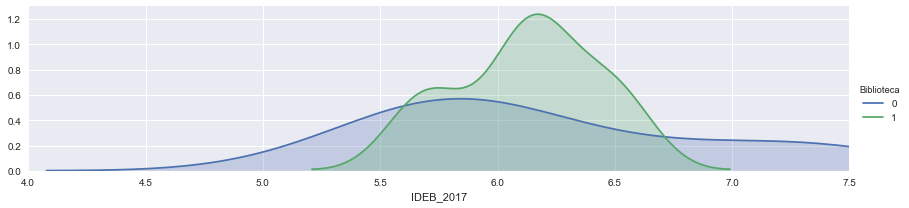

In [9]:
#Biblioteca em relação notas nos Anos inicias
facet = sns.FacetGrid(df, hue="Biblioteca",aspect=4)
facet.map(sns.kdeplot,'IDEB_2017',shade= True)
facet.set(xlim=(4, df['IDEB_2017'].max()))
facet.add_legend()
plt.show() 

C:\Users\aliss\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\aliss\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


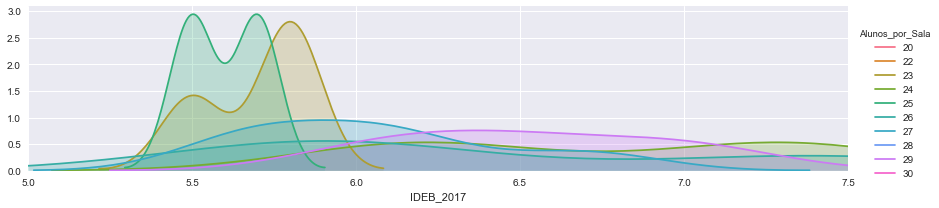

In [10]:
#Alunos por Sala em relação notas nos Anos inicias
facet = sns.FacetGrid(df, hue="Alunos_por_Sala",aspect=4)
facet.map(sns.kdeplot,'IDEB_2017',shade= True)
facet.set(xlim=(5, df['IDEB_2017'].max()))
facet.add_legend()
plt.show() 

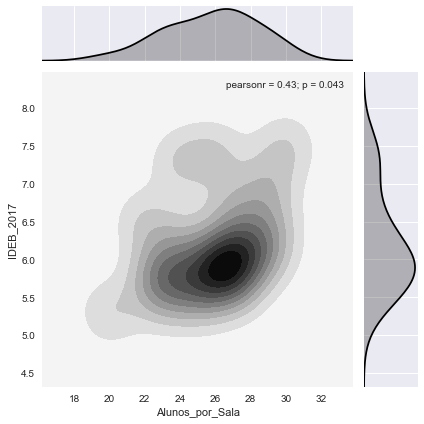

In [11]:
sns.jointplot(data=df, x="Alunos_por_Sala", y="IDEB_2017", kind="kde", color="k")

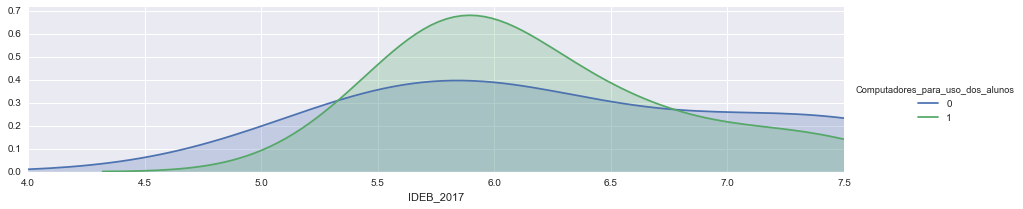

In [12]:
#Computadores para usso dos alunos em relação notas nos Anos inicias
facet = sns.FacetGrid(df, hue="Computadores_para_uso_dos_alunos",aspect=4)
facet.map(sns.kdeplot,'IDEB_2017',shade= True)
facet.set(xlim=(4, df['IDEB_2017'].max()))
facet.add_legend()
plt.show() 

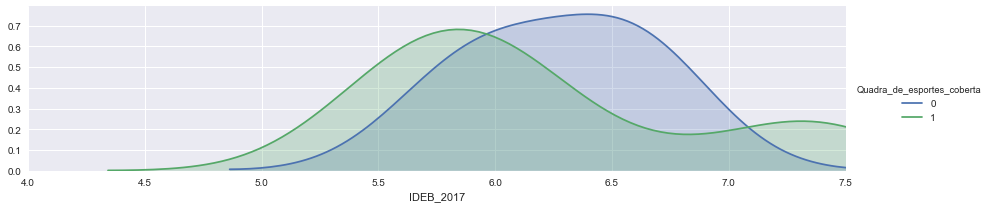

In [77]:
#Refeitoriao para uso dos alunos em relação notas nos Anos inicias
facet = sns.FacetGrid(df, hue="Quadra_de_esportes_coberta",aspect=4)
facet.map(sns.kdeplot,'IDEB_2017',shade= True)
facet.set(xlim=(4, df['IDEB_2017'].max()))
facet.add_legend()
plt.show() 

## Variaiveis na infra que não gera relação com o ideb
Como exemplo a cima  deixei o Refeitorio, segue lista com todos as variaveis que sem valor:

Pátio_descoberto               
Refeitorio               
Laboratório_de_ciências           
Sala_de_professores                                   
Sala_de_secretaria                                      
Sala_de_diretoria                                      
Almoxarifado                                    
Refeitório          
Banheiro_Fora_do_Prédio        
Banheiro_Dentro_do_Prédio               
Auxiliares_Monitores_Tradutores_de_Libras               
Quadra_de_esportes_coberta         
Quadra_de_esportes_descoberta              
Modalidades_Etapas_Oferecidas

### Y - variável dependente (resultado do Enad 2017)
### X - variáveis independentes ou explanatórias (todas as outras caracterísricas da escolas)

In [14]:
# Importando o módulo de regressão linear 
from sklearn.linear_model import LinearRegression

In [15]:
Y = df['IDEB_2017']

In [16]:
#  POsso usar uma exclução que volta ou como no codigo abaixo ou usar oque eu mais gosto apagar msm kkk
#X = df.drop('IDEB_2017_1',axis = 1)
X = df.drop(columns=['IDEB_2017'])

#'Pátio_descoberto','Laboratório_de_ciências','Sala_de_professores','Sala_de_secretaria','Sala_de_diretoria','Almoxarifado','Refeitório','Banheiro_Fora_do_Prédio','Auxiliares_Monitores_Tradutores_de_Libras','Quadra_de_esportes_coberta','Quadra_de_esportes_descoberta','Modalidades_Etapas_Oferecidas'

#Não queremos o valor do resultado no ideb como variável dependente
testes
X = df.drop('IDEB_2017', axis = 1)

In [17]:
X

,Código_da_Escola,Matrículas,Matriculas_em_Tempo_Integral,Turmas,Alunos_por_Sala,Salas_de_Aula,Docentes,Auxiliares_Monitores_Tradutores_de_Libras,Total_de_Funcionários,Indicador_de_Nível_Socioeconômico_INSE,...,Pátio_descoberto,Pátio_coberto,Auditório,Quadra_de_esportes_coberta,Quadra_de_esportes_descoberta,Parque_infantil,Área_verde,Participa_do_Mais_Educação,Escola_oferece_atividades_complementares,Escola_abre_nos_finais_de_semana_para_a_comunidade
0,35905800,372,0,16,23,8,22,1,43,4,...,0,1,0,1,0,0,1,0,0,0
1,35900734,236,0,12,20,8,14,1,28,3,...,1,1,0,1,0,0,0,1,1,0
2,35925676,432,0,16,27,16,24,0,52,4,...,0,0,0,1,0,0,0,0,1,0
3,35023796,317,0,11,29,11,19,0,44,5,...,1,1,0,0,0,0,0,0,0,0
4,35446282,810,66,32,25,16,44,5,72,4,...,0,1,1,1,1,0,0,1,1,0
5,35023966,701,1,26,27,13,31,0,47,4,...,1,1,0,1,0,0,1,0,0,0
6,35903462,419,0,16,26,10,19,0,40,4,...,0,1,0,1,0,0,1,0,0,0
7,35023905,512,0,20,26,10,23,1,37,4,...,1,1,0,1,0,0,0,0,0,0
8,35925688,254,89,11,23,6,14,5,33,4,...,0,1,0,1,0,0,1,1,1,0
9,35918155,664,0,25,27,13,31,0,40,4,...,1,1,0,1,0,0,0,0,0,0


In [18]:
Y

0     5.5
1     5.3
2     5.7
3     6.1
4     5.7
5     5.7
6     5.9
7     7.4
8     5.8
9     6.1
10    7.0
11    7.5
12    7.3
13    6.5
14    5.9
15    6.1
16    6.7
17    5.5
18    6.2
19    6.1
20    6.5
21    5.8
Name: IDEB_2017, dtype: float64

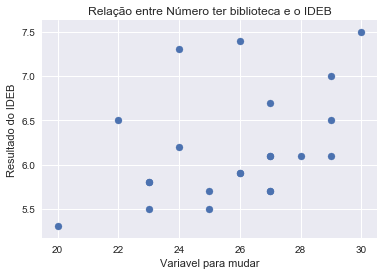

In [19]:
#Plot vamos usar um grafico de disperção para ver relação
plt.scatter(df.Alunos_por_Sala,Y)
plt.xlabel("Variavel para mudar")
plt.ylabel("Resultado do IDEB")
plt.title("Relação entre Número ter biblioteca e o IDEB")
plt.show()

In [20]:
# Aplicando regressão linear para apenas uma variável e calculando o MSE
regr = LinearRegression()
regr.fit(X[['Participa_do_Mais_Educação']],df.IDEB_2017)
mse2 = np.mean((df.IDEB_2017 - regr.predict(X[['Participa_do_Mais_Educação']])) ** 2)
print(mse2)

0.38305194805194803


## Vamos então dividir os datasets randomicamente. O Scikit-Learn provê uma função chamada train_test_split() para isso.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Dividindo X e Y em dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, df.IDEB_2017, test_size = 0.5, random_state = 5)

In [23]:
# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(11, 29) (11, 29) (11,) (11,)


In [24]:
# Construindo um modelo de regressão
regr = LinearRegression()

In [54]:
# Treinando o modelo
regr.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
# Definindo os dados de treino e teste
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

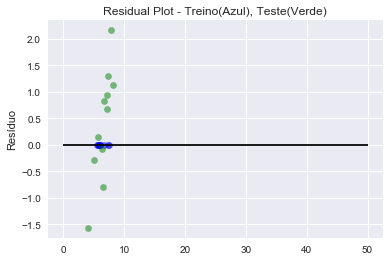

In [56]:
# Comparando preços originais x preços previstos
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()

In [57]:
# Vamos calcular o MSE (Mean Squared Error)
mse1 = np.mean((Y - regr.predict(X)) ** 2)
print(mse1)

0.5847529814671902


In [107]:
teste = pd.teste

AttributeError: module 'pandas' has no attribute 'teste'

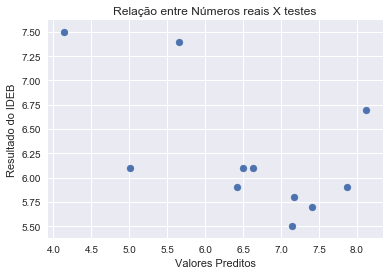

In [82]:
#Plot vamos usar um grafico de disperção para ver relação
plt.scatter(pred_teste,pred_treino)
plt.xlabel("Valores Preditos")
plt.ylabel("Resultado do IDEB")
plt.title("Relação entre Números reais X testes")
plt.show()

In [75]:
## testes de classficadores 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Cross Validation (K-fold)

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)